In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('cars.csv')
train_df.head()
train_df.shape

(963, 6)

In [3]:
x = train_df.drop(columns = ['Money on car'])
y = train_df[('Money on car')]
y = np.array(y)
y = y.reshape(-1,1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#80% train and 20% test
train_X1,test_X1,train_Y1,test_Y1= train_test_split(x,y,test_size=0.2,random_state=1)

#60% train and 40% test
train_X2,test_X2,train_Y2,test_Y2= train_test_split(x,y,test_size=0.4,random_state=1)

In [7]:
import keras

Using TensorFlow backend.


In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()
n_cols = x.shape[1]
model.add(Dense (200, activation='relu', input_shape=(n_cols,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1))

In [10]:
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error','mean_squared_error'])

history_1 = model.fit(train_X1, train_Y1, validation_split=0.2, epochs=150)

Train on 616 samples, validate on 154 samples
Epoch 1/150
616/616 [==============================] - 0s 359us/step - loss: 0.0448 - mean_absolute_error: 0.1577 - mean_squared_error: 0.0448 - val_loss: 0.0203 - val_mean_absolute_error: 0.1113 - val_mean_squared_error: 0.0203
Epoch 2/150
616/616 [==============================] - 0s 79us/step - loss: 0.0179 - mean_absolute_error: 0.1038 - mean_squared_error: 0.0179 - val_loss: 0.0166 - val_mean_absolute_error: 0.0993 - val_mean_squared_error: 0.0166
Epoch 3/150
616/616 [==============================] - 0s 99us/step - loss: 0.0159 - mean_absolute_error: 0.0969 - mean_squared_error: 0.0159 - val_loss: 0.0182 - val_mean_absolute_error: 0.1057 - val_mean_squared_error: 0.0182
Epoch 4/150
616/616 [==============================] - 0s 78us/step - loss: 0.0165 - mean_absolute_error: 0.0988 - mean_squared_error: 0.0165 - val_loss: 0.0130 - val_mean_absolute_error: 0.0796 - val_mean_squared_error: 0.0130
Epoch 5/150
616/616 [====================

In [11]:
scores = model.evaluate(test_X1,test_Y1)
print(model.metrics_names[1], scores[1])

193/193 [==============================] - 0s 31us/step
mean_absolute_error 0.08267750591039658


In [12]:
print(history_1.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])


<function matplotlib.pyplot.show(*args, **kw)>

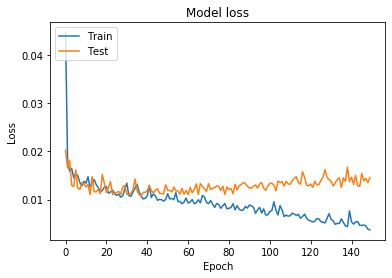

In [18]:
import matplotlib.pyplot as plt
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show

In [14]:
history_2 = model.fit(train_X2, train_Y2, validation_split=0.2, epochs=150)

Train on 461 samples, validate on 116 samples
Epoch 1/150
461/461 [==============================] - 0s 82us/step - loss: 0.0043 - mean_absolute_error: 0.0462 - mean_squared_error: 0.0043 - val_loss: 0.0163 - val_mean_absolute_error: 0.0809 - val_mean_squared_error: 0.0163
Epoch 2/150
461/461 [==============================] - 0s 89us/step - loss: 0.0038 - mean_absolute_error: 0.0442 - mean_squared_error: 0.0038 - val_loss: 0.0152 - val_mean_absolute_error: 0.0771 - val_mean_squared_error: 0.0152
Epoch 3/150
461/461 [==============================] - 0s 80us/step - loss: 0.0039 - mean_absolute_error: 0.0442 - mean_squared_error: 0.0039 - val_loss: 0.0157 - val_mean_absolute_error: 0.0806 - val_mean_squared_error: 0.0157
Epoch 4/150
461/461 [==============================] - 0s 87us/step - loss: 0.0037 - mean_absolute_error: 0.0426 - mean_squared_error: 0.0037 - val_loss: 0.0159 - val_mean_absolute_error: 0.0797 - val_mean_squared_error: 0.0159
Epoch 5/150
461/461 [=====================

In [15]:
scores = model.evaluate(test_X2,test_Y2)
print(model.metrics_names[1], scores[1])

386/386 [==============================] - 0s 34us/step
mean_absolute_error 0.07857807725667953


In [16]:
print(history_2.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])


<function matplotlib.pyplot.show(*args, **kw)>

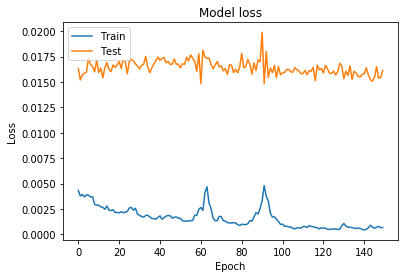

In [17]:
import matplotlib.pyplot as plt
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show

# CONCLUSION

In [ ]:
Activation used in this Model is 'Relu'
On observing the output values of 'Loss', 'Mean Absolute Erro', 'Prediction Socre' the data splited as 60% train and 40% test 
shows the improved result for this developed FNN model. 
MSE for 60-40 is lesser than 80-20